In [9]:
# import dependences
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from pathlib import Path




In [10]:
# read the csv file into a data frame
data_path = Path('Project1-DELTS', 'hockey_starting_data', 'Scoring.csv')
data = pd.read_csv(data_path)
data


,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45962,zyuzian01,2002,2,MIN,NHL,D,66.0,4.0,12.0,16.0,...,1.0,1.0,14.0,-3.0,0.0,0.0,0.0,0.0,0.0,30.0
45963,zyuzian01,2003,1,MIN,NHL,D,65.0,8.0,13.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45964,zyuzian01,2005,1,MIN,NHL,D,57.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45965,zyuzian01,2006,1,CAL,NHL,D,49.0,1.0,5.0,6.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0


In [11]:
clean_data = data[['playerID','year', 'tmID', 'GP','G', 'A', 'Pts','SOG']]
# clean_data['year']= clean_data['year'].astype(int)
clean_data = clean_data.set_index('year')

In [12]:
clean_data 

,playerID,tmID,GP,G,A,Pts,SOG
year,,,,,,,
1997,aaltoan01,ANA,3.0,0.0,0.0,0.0,1.0
1998,aaltoan01,ANA,73.0,3.0,5.0,8.0,61.0
1999,aaltoan01,ANA,63.0,7.0,11.0,18.0,102.0
2000,aaltoan01,ANA,12.0,1.0,1.0,2.0,18.0
1975,abbeybr01,CIN,17.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...
2002,zyuzian01,MIN,66.0,4.0,12.0,16.0,113.0
2003,zyuzian01,MIN,65.0,8.0,13.0,21.0,104.0
2005,zyuzian01,MIN,57.0,7.0,11.0,18.0,80.0


In [13]:
per_team_data = clean_data.groupby('year')['SOG'].mean().dropna()
per_team_df = pd.DataFrame(per_team_data)

# per_team_df=per_team_df[(per_team_df['year'] >= 1980) & (per_team_df['year']<=2010)]
# per_team_df = per_team_df.loc[(per_team_df!=0).any(axis=1)]
per_team_df.head()

,SOG
year,
1967,79.622419
1968,83.742857
1969,87.099415
1970,81.174825
1971,79.436620


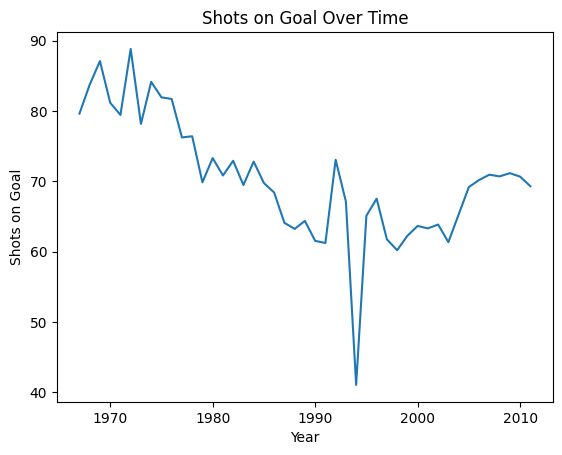

In [16]:
plt.plot(per_team_df.index, per_team_df['SOG'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Shots on Goal')
plt.title('Shots on Goal Over Time')
plt.show()
